In [6]:
# Importing tools

import pandas as pd

from sklearn import preprocessing

In [7]:
# reading data

df = pd.read_csv('housepricedata.csv')

In [8]:
# have look on data
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
5,14115,5,5,796,1,1,1,5,0,480,0
6,10084,8,5,1686,2,0,3,7,1,636,1
7,10382,7,6,1107,2,1,3,7,2,484,1
8,6120,7,5,952,2,0,2,8,2,468,0
9,7420,5,6,991,1,0,2,5,2,205,0


In [9]:
dataset = df.values

In [10]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

# Spliting data 

In [11]:
input_fetaures = dataset[:,0:10]

In [12]:
predict = dataset[:,10]

In [13]:
min_max_scaler = preprocessing.MinMaxScaler()
input_feature_scale = min_max_scaler.fit_transform(input_fetaures)

/Users/ankitkumar/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [14]:
input_feature_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# This tells scikit-learn that your val_and_test size will be 30% of the overall dataset
input_fetaures_train, input_fetaures_val_and_test, predict_train, predict_val_and_test = train_test_split(input_feature_scale, predict, test_size=0.3)

# use the same function to do the split again on val_and_test
input_fetaures_val, input_fetaures_test, predict_val, predict_test = train_test_split(input_fetaures_val_and_test, predict_val_and_test, test_size=0.5)

# Above line will split the val_and_test size equally to the validation set and the test set



In [17]:
print(input_fetaures_train.shape, input_fetaures_val.shape, input_fetaures_test.shape, predict_train.shape, predict_val.shape, predict_test.shape)




(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


# Building and Training our First Neural Network

### Setting up the Architecture


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [19]:
# Specifying model

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

### Filling in the best numbers


In [20]:
# Configuring the model with these settings requires us to call the function model.compile
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [21]:
# Training on the data is pretty straightforward and requires us to write one line of code
hist = model.fit(input_fetaures_train, predict_train,
          batch_size=12, epochs=100,
          validation_data=(input_fetaures_val, predict_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 0s 395us/sample - loss: 0.6876 - accuracy: 0.5245 - val_loss: 0.6937 - val_accuracy: 0.4292
Epoch 2/100
1022/1022 [==============================] - 0s 106us/sample - loss: 0.6867 - accuracy: 0.5235 - val_loss: 0.6933 - val_accuracy: 0.4292
Epoch 3/100
1022/1022 [==============================] - 0s 96us/sample - loss: 0.6857 - accuracy: 0.5225 - val_loss: 0.6929 - val_accuracy: 0.4338
Epoch 4/100
1022/1022 [==============================] - 0s 93us/sample - loss: 0.6848 - accuracy: 0.5235 - val_loss: 0.6925 - val_accuracy: 0.4338
Epoch 5/100
1022/1022 [==============================] - 0s 98us/sample - loss: 0.6838 - accuracy: 0.5235 - val_loss: 0.6922 - val_accuracy: 0.4338
Epoch 6/100
1022/1022 [==============================] - 0s 101us/sample - loss: 0.6829 - accuracy: 0.5225 - val_loss: 0.6916 - val_accuracy: 0.4338
Epoch 7/100
1022/1022 [==============================] - 0s 10

1022/1022 [==============================] - 0s 127us/sample - loss: 0.6185 - accuracy: 0.7524 - val_loss: 0.6349 - val_accuracy: 0.6621
Epoch 56/100
1022/1022 [==============================] - 0s 106us/sample - loss: 0.6169 - accuracy: 0.7593 - val_loss: 0.6333 - val_accuracy: 0.6667
Epoch 57/100
1022/1022 [==============================] - 0s 95us/sample - loss: 0.6154 - accuracy: 0.7661 - val_loss: 0.6319 - val_accuracy: 0.6667
Epoch 58/100
1022/1022 [==============================] - 0s 89us/sample - loss: 0.6138 - accuracy: 0.7691 - val_loss: 0.6304 - val_accuracy: 0.6758
Epoch 59/100
1022/1022 [==============================] - 0s 94us/sample - loss: 0.6122 - accuracy: 0.7691 - val_loss: 0.6290 - val_accuracy: 0.6804
Epoch 60/100
1022/1022 [==============================] - 0s 96us/sample - loss: 0.6105 - accuracy: 0.7720 - val_loss: 0.6273 - val_accuracy: 0.6941
Epoch 61/100
1022/1022 [==============================] - 0s 96us/sample - loss: 0.6089 - accuracy: 0.7769 - val_loss

In [22]:
model.evaluate(input_fetaures_test, predict_test)[1]

219/219 [==============================] - 0s 23us/sample - loss: 0.5221 - accuracy: 0.8539


0.8538813

Due to the randomness in how we have split the dataset as well as the initialization of the weights, the numbers and graph will differ slightly each time we run our notebook. Nevertheless, you should get a test accuracy anywhere between 80% to 95% if you’ve followed the architecture I specified above!

# Visualizing Loss and Accuracy

In [23]:
import matplotlib.pyplot as plt

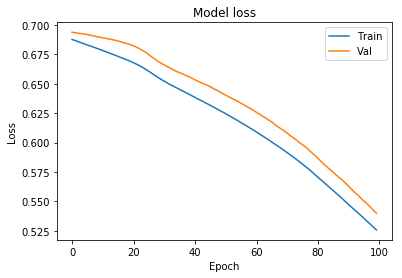

In [24]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

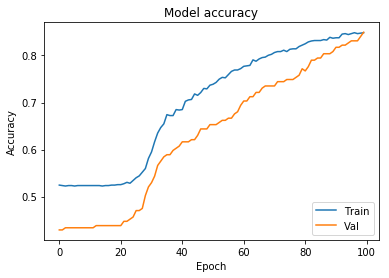

In [25]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Adding Regularization to Neural Network

In [ ]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(input_fetaures_train, predict_train,
          batch_size=32, epochs=100,
          validation_data=(input_fetaures_val, predict_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 594us/sample - loss: 0.4993 - accuracy: 0.7515 - val_loss: 0.4457 - val_accuracy: 0.7443
Epoch 2/100
1022/1022 [==============================] - 0s 327us/sample - loss: 0.3652 - accuracy: 0.8434 - val_loss: 0.2893 - val_accuracy: 0.8767
Epoch 3/100
1022/1022 [==============================] - 0s 338us/sample - loss: 0.3247 - accuracy: 0.8601 - val_loss: 0.2739 - val_accuracy: 0.8676
Epoch 4/100
1022/1022 [==============================] - 0s 330us/sample - loss: 0.3112 - accuracy: 0.8640 - val_loss: 0.2637 - val_accuracy: 0.9224
Epoch 5/100
1022/1022 [==============================] - 0s 342us/sample - loss: 0.3003 - accuracy: 0.8777 - val_loss: 0.2890 - val_accuracy: 0.8721
Epoch 6/100
1022/1022 [==============================] - 0s 412us/sample - loss: 0.2711 - accuracy: 0.8885 - val_loss: 0.2146 - val_accuracy: 0.9224
Epoch 7/100
1022/1022 [==============================] - 0s